# Tree Based Models
## Decision Tree
## Random Forrest
## Xgboost

# Model Evaluation

## K fold crossvalidation
## Grid Search
## Confusion Matrix
## classification report
## Score matrix

In [7]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/datasets_19_420_Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.drop('Id', axis = 1, inplace = True)

In [9]:
df.shape

(150, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


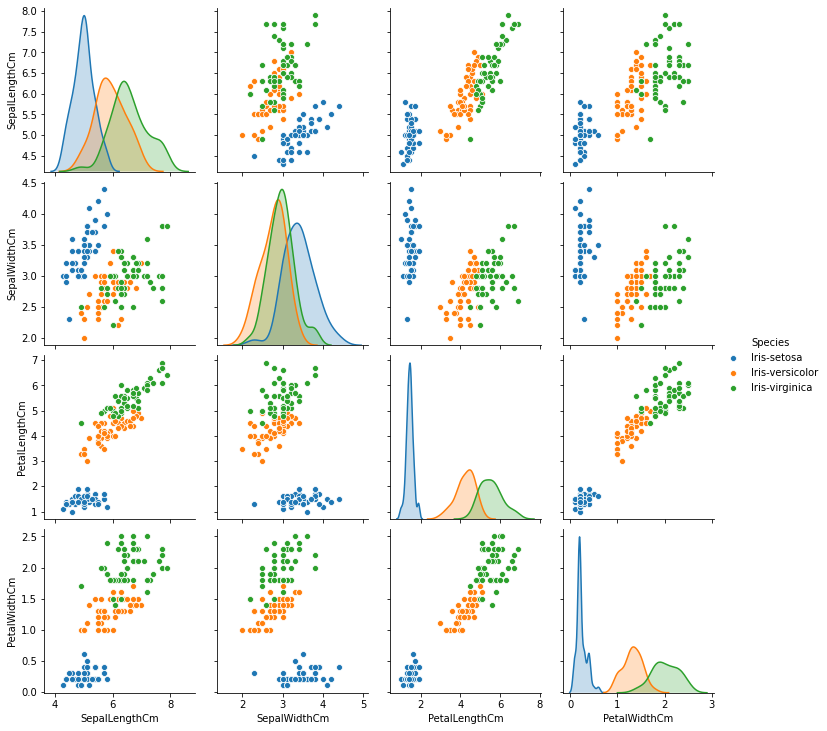

<Figure size 1080x720 with 0 Axes>

In [15]:
sns.pairplot(df, hue= 'Species', )
plt.figure(figsize= (15, 10))
plt.show()

In [16]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# sepalArea = sepallength*sepalwidth
# petalArea = petallength*petalwidh
# sepal_petal_ratio = sepalArea/petalArea

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le_y = LabelEncoder()

In [20]:
df['Species']  = le_y.fit_transform(df['Species'])

In [23]:
le_y.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
# features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
X.shape, y.shape

((150, 4), (150,))

In [27]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
y[-10:]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [31]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [32]:
# No need to do scalling using tree based model

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, min_samples_leaf = 4)

In [49]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
import graphviz
from sklearn import tree

In [51]:
dot_data = tree.export_graphviz(clf, out_file= None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

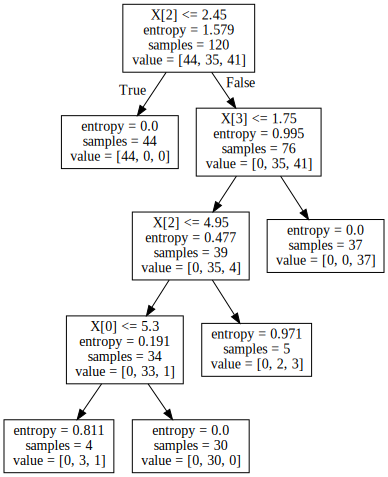

In [52]:
graph

In [53]:
clf.score(X_train, y_train)

0.975

In [54]:
clf.score(X_test, y_test)

0.9666666666666667

In [56]:
y_pred = clf.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix

In [58]:
print(confusion_matrix(y_test, y_pred))

[[ 6  0  0]
 [ 0 14  1]
 [ 0  0  9]]


In [59]:
y_test.shape

(30,)

In [60]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.93      0.97        15
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30

